In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_covtype
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

In [ ]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [ ]:
X_2d = X[:, :2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2d, y)

**Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.**

In [ ]:
clf = SVC(C=0.01)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.636150234741784
0.6013986013986014


модель обучена слабо

**Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):**
- собрать больше объектов наблюдения;
- провести обучение на меньшем объеме данных;
- исключить часть признаков из модели;
- добавить новые признаки в модель;
- добавить полиномиальные признаки;
- попробовать более сложные модели;
- попробовать более простые модели;
- увеличить регуляризацию модели;
- уменьшить регуляризацию модели;

In [ ]:
def learning_curve(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, C=10):
    training_scores = []
    test_scores = []
    numbers = []

    for i in np.linspace(20, len(X_train), 20):
        clf = SVC(C=C, kernel='rbf')
        X = X_train[:int(i)]
        y = y_train[:int(i)]
        clf.fit(X, y)
        numbers.append(int(i))
        training_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    plt.figure(figsize=(10, 5))
    plt.ylim([0.8, 1])
    plt.plot(numbers, training_scores, label="training scores")
    plt.plot(numbers, test_scores, label="test scores")
    plt.legend(loc="best");

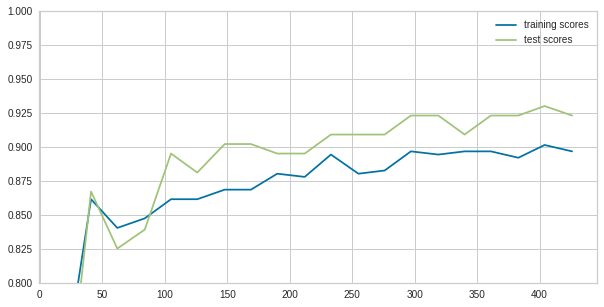

In [ ]:
learning_curve()

можно предположить, что при увеличении выборки увеличится точность, а также, если немного уменьшить параметр регуляризации, можно попробовать добавить признаков

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)

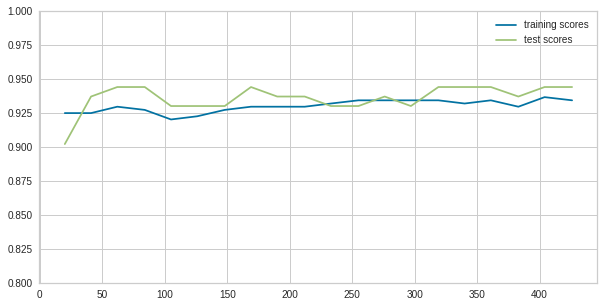

In [ ]:
learning_curve(X_train2, X_test2, y_train2, y_test2, 100)

тестовая точность явно увеличивается

**Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?**

In [ ]:
def learning_curve_C(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, kernel='rbf'):
    training_scores = []
    test_scores = []
    C = []

    for i in np.arange(-4,7):
        clf = SVC(C=10.0**i, kernel='rbf')
        clf.fit(X_train, y_train)
        C.append(10.0**i)
        training_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    plt.figure(figsize=(10, 5))
    plt.ylim([0.8, 1])
    plt.plot(C, training_scores, label="training scores")
    plt.plot(C, test_scores, label="test scores")
    plt.xscale("log")
    plt.grid()
    plt.legend(loc="best");

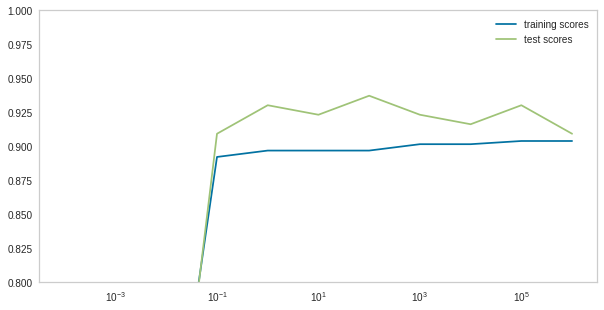

In [ ]:
learning_curve_C()

тестовая оптимальная примерно для 0.1

**Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.**

начиная от 10 тестовая точность почти не меняется, до 0.1 вообще плохая модеот получается. С ростом C растет тренировочная точность

**Найдите методом подбора оптимальное значение параметра регуляризации (примерное).**

оптимальное примерно 0.1

**Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.**

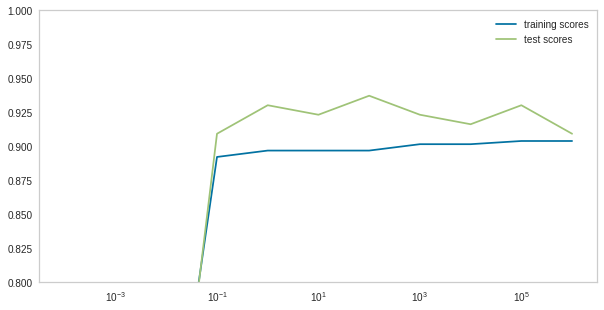

In [ ]:
learning_curve_C(kernel='linear')

**Повторите такой же анализ для полиномиального ядра и степени полинома как гиперпараметра. Прокомментируйте кривые обучения для случаев недо-и переобучения.**

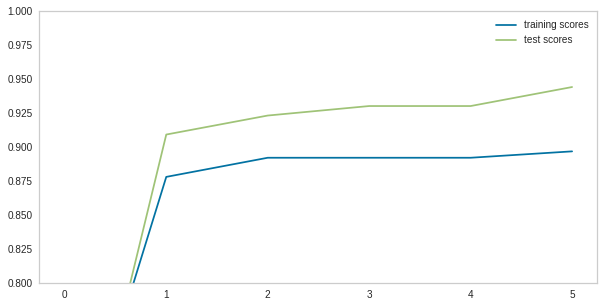

In [ ]:
training_scores = []
test_scores = []
degrees = []
for deg in np.arange(6):
    clf = SVC(kernel='poly', degree=deg)
    clf.fit(X_train, y_train)
    degrees.append(deg)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.ylim([0.8, 1])
plt.plot(degrees, training_scores, label="training scores")
plt.plot(degrees, test_scores, label="test scores")
plt.grid()
plt.legend(loc="best");

**Исследуйте зависимость степени обученности модели от значения других гиперпараметров различных классификаторов, реализованных в sklearn. Постройте кривые обучения в зависимости от значения этих параметров.**

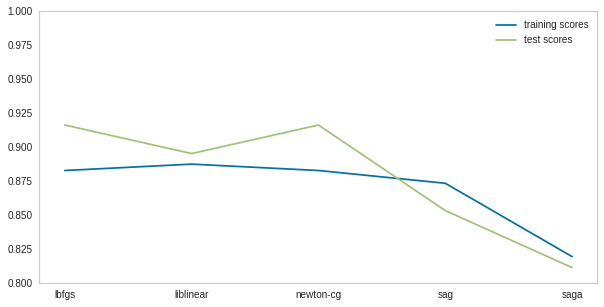

In [ ]:
warnings.simplefilter("ignore", category=ConvergenceWarning)

training_scores = []
test_scores = []
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']0
for solver in solvers:
    clf = LogisticRegression(solver=solver)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
plt.figure(figsize=(10, 5))
plt.ylim([0.8, 1])
plt.plot(solvers, training_scores, label="training scores")
plt.plot(solvers, test_scores, label="test scores")
plt.grid()
plt.legend(loc="best");

**Повторите данное исследование на полном датасете. Сделайте выводы об оптимальной регуляризации моделей.**

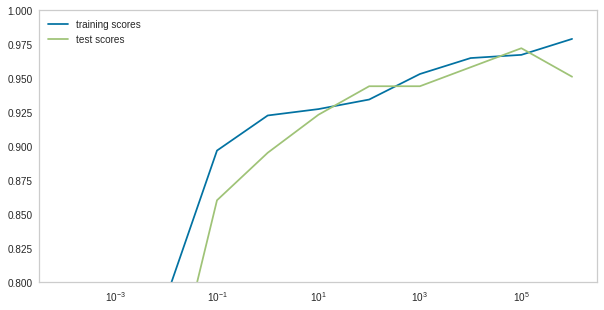

In [ ]:
learning_curve_C(X_train=X_train2, X_test=X_test2, y_train=y_train2, y_test=y_test2, kernel='rbf')

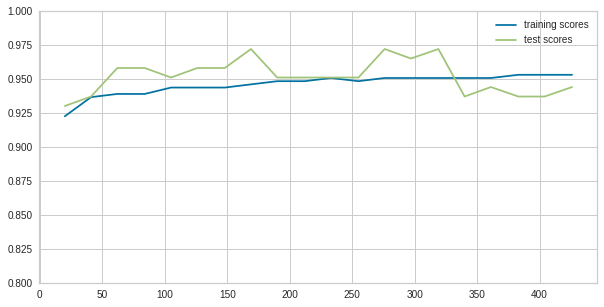

In [ ]:
learning_curve_C(X_train2, X_test2, y_train2, y_test2, 1000)

**Повторите данное исследование на другом датасете. Предпочтительно выбирать более объемный набор данных для классификации (несколько тысяч примеров на каждый класс).**

In [ ]:
fetch = fetch_covtype()

In [ ]:
data_rcv, _, target_rcv, _ = train_test_split(fetch.data, fetch.target, train_size=0.007)

In [ ]:
data_rcv.shape

(144, 8)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data_rcv, target_rcv)

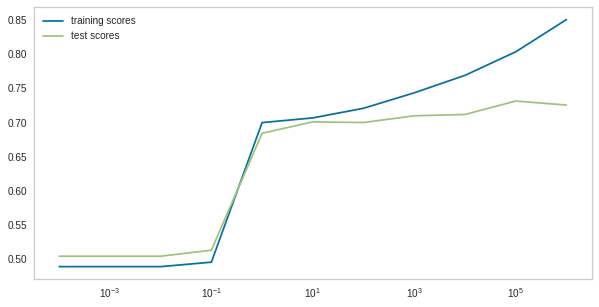

In [ ]:
training_scores = []
test_scores = []
C = []
for i in np.arange(-4,7):
    clf = SVC(C=10.0**i, kernel='rbf')
    clf.fit(X_train3, y_train3)
    C.append(10.0**i)
    training_scores.append(clf.score(X_train3, y_train3))
    test_scores.append(clf.score(X_test3, y_test3))
    
plt.figure(figsize=(10, 5))
plt.plot(C, training_scores, label="training scores")
plt.plot(C, test_scores, label="test scores")
plt.xscale("log")
plt.grid()
plt.legend(loc="best");

**Напишите функцию, которая автоматизирует процесс подбора гиперпараметров данной модели путем проверки ошибок на тестовой выборке моделей с разными значениями гиперпараметра. Сравните вашу реализацию с функцией GridSearch.**

In [ ]:
def best_hyperparams(x_train, x_test, y_train, y_test):
    Cs = 10.0**np.arange(-4,7)
    gammas = 10.0**np.arange(-4,7)
    best_gamma = gest_C = None
    score = 0
    for C in Cs:
        for gamma in gammas:
            clf = SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(x_train, y_train)
            temp = clf.score(x_test, y_test)
            if (temp>score):
                best_gamma = gamma
                best_C = C
                score = temp
    return best_gamma, best_C

In [ ]:
best_hyperparams(X_train3, X_test3, y_train3, y_test3)

(0.0001, 10.0)

In [ ]:
gg = GridSearchCV(SVC(kernel='rbf'), {'C':10.0**np.arange(-4,7), 'gamma':10.0**np.arange(-4,7)})

In [ ]:
gg.fit(data_rcv, target_rcv)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05, 1.e+06]),
                         'gamma': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04, 1.e+05, 1.e+06])})

In [ ]:
gg.best_params_

{'C': 10.0, 'gamma': 0.0001}